# dN/dS ratio in SARS-CoV-2

The dN/dS ratio can be used to estimate the selective pressure.
Here we aim at exploring the evolution of the dN/dS ratio through time across different countries and genes.

For that purpose we will explore the results from ENA (queried on 07/07/2021, n=44,371) and from GISAID (queried on ...).

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")

In [5]:
data = pd.read_csv('precomputed_dn_ds_v15.csv')
data["dn_ds"] = data.dn / (data.ds + 1)
data.head()

,id,month,gene_name,country,source,dn,ds,dn_ds
0,839,2021-03-01,ORF7b,Poland,ENA,1,9,0.100000
1,840,2020-06-01,S,Brazil,ENA,32,3,8.000000
2,841,2021-03-01,N,Philippines,ENA,9,6,1.285714
3,842,2020-10-01,M,Spain,ENA,7,476,0.014675
4,843,2020-10-01,ORF10,Spain,ENA,450,1,225.000000


In [6]:
data_by_domain = pd.read_csv('precomputed_dn_ds_by_domain_v15.csv')
data_by_domain["dn_ds"] = data_by_domain.dn / (data_by_domain.ds + 1)
data_by_domain.head()

,id,month,domain,country,source,dn,ds,dn_ds
0,1,2020-02-01,0,China,ENA,19,5,3.166667
1,2,2020-03-01,0,United States,ENA,27,15,1.687500
2,3,2020-04-01,CoV_NSP15_M,United States,ENA,0,1,0.000000
3,4,2020-04-01,CoV_NSP2_N,United States,ENA,0,2,0.000000
4,5,2020-04-01,CoV_NSP4_N,China,ENA,1,1,0.500000


## dN/dS by country

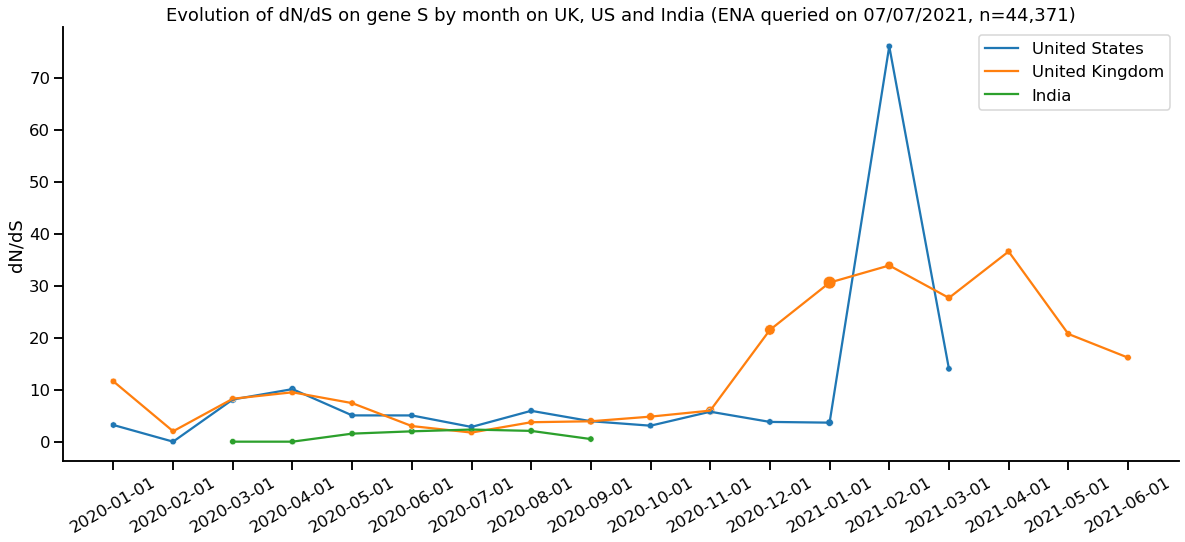

In [7]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=data[(data.gene_name == "S") & (data.country.isin(["United Kingdom", "United States", "India"]))].sort_values("month"), 
             x="month", y="dn_ds", hue="country")
sns.scatterplot(data=data[(data.gene_name == "S") & (data.country.isin(["United Kingdom", "United States", "India"]))].sort_values("month"), 
             x="month", y="dn_ds", hue="country", size="dn", legend=False)
plt.xticks(rotation=30)
plt.title("Evolution of dN/dS on gene S by month on UK, US and India (ENA queried on 07/07/2021, n=44,371)")
plt.ylabel("dN/dS")
plt.xlabel(None)
plt.legend(title=None)
sns.despine()
plt.savefig('dn_ds_by_month_on_uk_us_india.png')

## dN/dS by gene

In [16]:
data_all_countries = data[["month", "gene_name", "dn", "ds"]].groupby(["month", "gene_name"]).sum().reset_index()
data_all_countries["dn_ds"] = data_all_countries.dn / (data_all_countries.ds + 1)
data_all_countries["dn_accum"] = data_all_countries.sort_values("month").groupby("gene_name")['dn'].cumsum()
data_all_countries["ds_accum"] = data_all_countries.sort_values("month").groupby("gene_name")['ds'].cumsum()
data_all_countries["dn_ds_accum"] = data_all_countries.dn_accum / (data_all_countries.ds_accum + 1)
data_all_countries.head()

,month,gene_name,dn,ds,dn_ds,dn_accum,ds_accum,dn_ds_accum
0,2019-12-01,E,0,1,0.0,0,1,0.0
1,2019-12-01,N,4,1,2.0,4,1,2.0
2,2019-12-01,ORF1ab,18,2,6.0,18,2,6.0
3,2019-12-01,ORF3a,1,0,1.0,1,0,1.0
4,2019-12-01,S,2,3,0.5,2,3,0.5


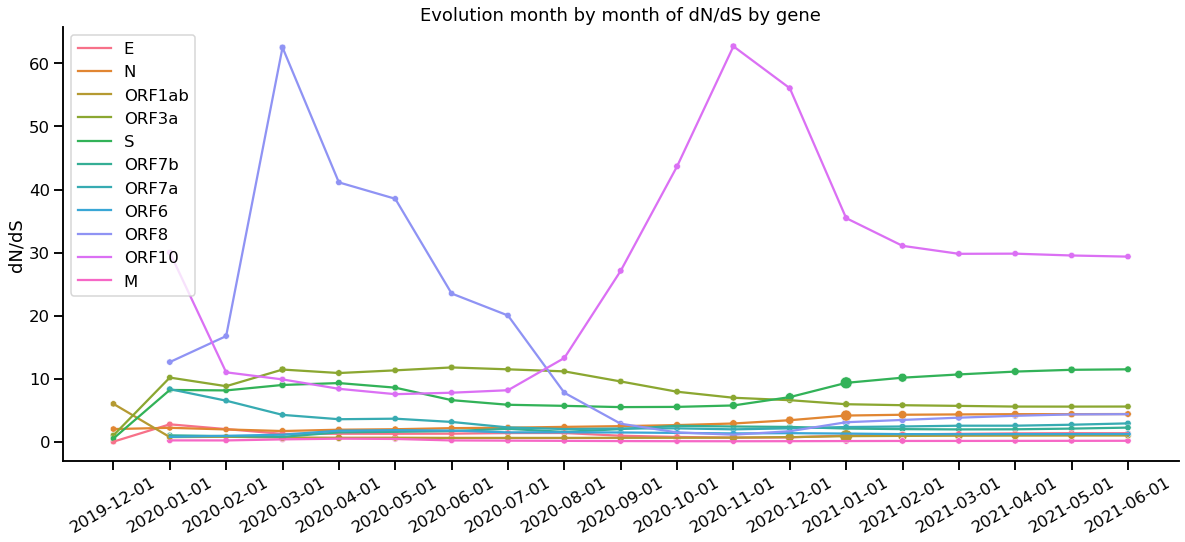

In [17]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=data_all_countries.sort_values("month"), x="month", y="dn_ds_accum", hue="gene_name")
sns.scatterplot(data=data_all_countries.sort_values("month"), x="month", y="dn_ds_accum", hue="gene_name", 
                size="dn", legend=False)
plt.xticks(rotation=30)
plt.title("Evolution month by month of dN/dS by gene")
plt.ylabel("dN/dS")
plt.xlabel(None)
plt.legend(title=None)
sns.despine()
plt.savefig('dn_ds_by_month_on_genes.png')

In [18]:
data_all_genes = data_all_countries[["gene_name", "dn", "ds"]].groupby("gene_name").sum().reset_index()
data_all_genes["dn_ds"] = data_all_genes.dn / data_all_genes.ds
data_all_genes.sort_values("dn_ds", ascending=False)

,gene_name,dn,ds,dn_ds
3,ORF10,8982,305,29.449180
10,S,126589,11028,11.478872
5,ORF3a,17886,3209,5.573699
2,N,98195,22400,4.383705
9,ORF8,26910,6167,4.363548
7,ORF7a,2472,851,2.904818
8,ORF7b,956,428,2.233645
0,E,862,643,1.340591
6,ORF6,772,637,1.211931
4,ORF1ab,154889,158374,0.977995


In [19]:
top_5_genes = list(data_all_genes.sort_values("dn_ds", ascending=False).gene_name.head(5))

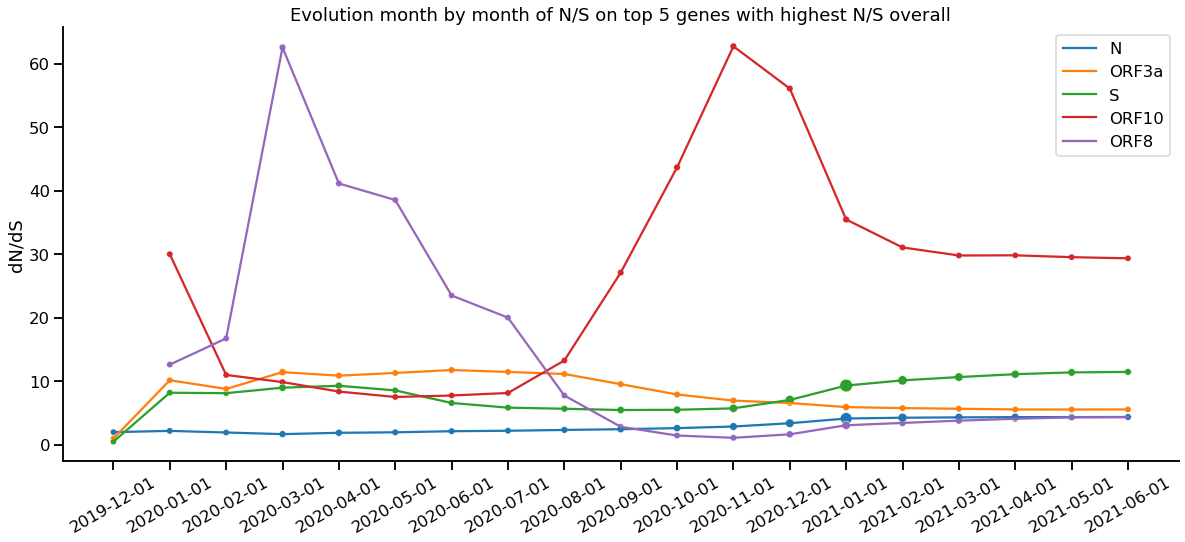

In [31]:
plt.figure(figsize=(20, 8))
data_top_5_genes = data_all_countries[(data_all_countries.gene_name.isin(top_5_genes))].sort_values("month")
sns.lineplot(data=data_top_5_genes, x="month", y="dn_ds_accum", hue="gene_name")
sns.scatterplot(data=data_top_5_genes, x="month", y="dn_ds_accum", hue="gene_name", size="dn", legend=False)
plt.xticks(rotation=30)
plt.title("Evolution month by month of N/S on top 5 genes with highest N/S overall")
plt.ylabel("dN/dS")
plt.xlabel(None)
plt.legend(title=None)
sns.despine()
plt.savefig('dn_ds_by_month_on_top5_genes.png')

In [8]:
%%markdown
## dN/dS by domain

## dN/dS by domain


In [25]:
data_by_domain_all_countries = data_by_domain[["month", "domain", "dn", "ds"]].groupby(["month", "domain"]).sum().reset_index()
data_by_domain_all_countries["dn_ds"] = data_by_domain_all_countries.dn / (data_by_domain_all_countries.ds + 1)
data_by_domain_all_countries["dn_accum"] = data_by_domain_all_countries.sort_values("month").groupby("domain")['dn'].cumsum()
data_by_domain_all_countries["ds_accum"] = data_by_domain_all_countries.sort_values("month").groupby("domain")['ds'].cumsum()
data_by_domain_all_countries["dn_ds_accum"] = data_by_domain_all_countries.dn_accum / (data_by_domain_all_countries.ds_accum + 1)
data_by_domain_all_countries.head()

,month,domain,dn,ds,dn_ds,dn_accum,ds_accum,dn_ds_accum
0,2019-12-01,CoV_NSP2_C,1,0,1.0,1,0,1.0
1,2019-12-01,CoV_NSP3_C,3,0,3.0,3,0,3.0
2,2019-12-01,Macro_dom,1,0,1.0,1,0,1.0
3,2019-12-01,bCoV_S1_N,1,0,1.0,1,0,1.0
4,2020-01-01,(+)RNA_virus_helicase_core_dom,3,4,0.6,3,4,0.6


In [26]:
data_all_domains = data_by_domain_all_countries[["domain", "dn", "ds"]].groupby("domain").sum().reset_index()
data_all_domains["dn_ds"] = data_all_domains.dn / data_all_domains.ds
data_all_domains.sort_values("dn_ds", ascending=False)

,domain,dn,ds,dn_ds
17,NS7B_SARS-like,894,36,24.833333
8,CoV_NSP4_N,39045,1834,21.289531
5,CoV_NSP2_C,17918,1077,16.636955
2,CoV_NSP15_C,31215,2349,13.288633
32,Protein_3a_bCoV,35509,4472,7.940295
33,RNA-dir_pol_C,33858,5543,6.108245
38,bCoV_S1_N,17583,2994,5.872745
37,Spike_rcpt-bd_bCoV,4714,873,5.399771
10,CoV_S1_C,819,158,5.183544
11,DPUP_SUD_C_bCoV,1053,270,3.900000


In [27]:
top_10_domains = list(data_all_domains.sort_values("dn_ds", ascending=False).domain.head(10))
top_10_domains

['NS7B_SARS-like',
 'CoV_NSP4_N',
 'CoV_NSP2_C',
 'CoV_NSP15_C',
 'Protein_3a_bCoV',
 'RNA-dir_pol_C',
 'bCoV_S1_N',
 'Spike_rcpt-bd_bCoV',
 'CoV_S1_C',
 'DPUP_SUD_C_bCoV']

In [28]:
spike_domains = ['bCoV_S1_N', 'Spike_rcpt-bd_bCoV', 'CoV_S1_C', 'Spike_S2_CoV']

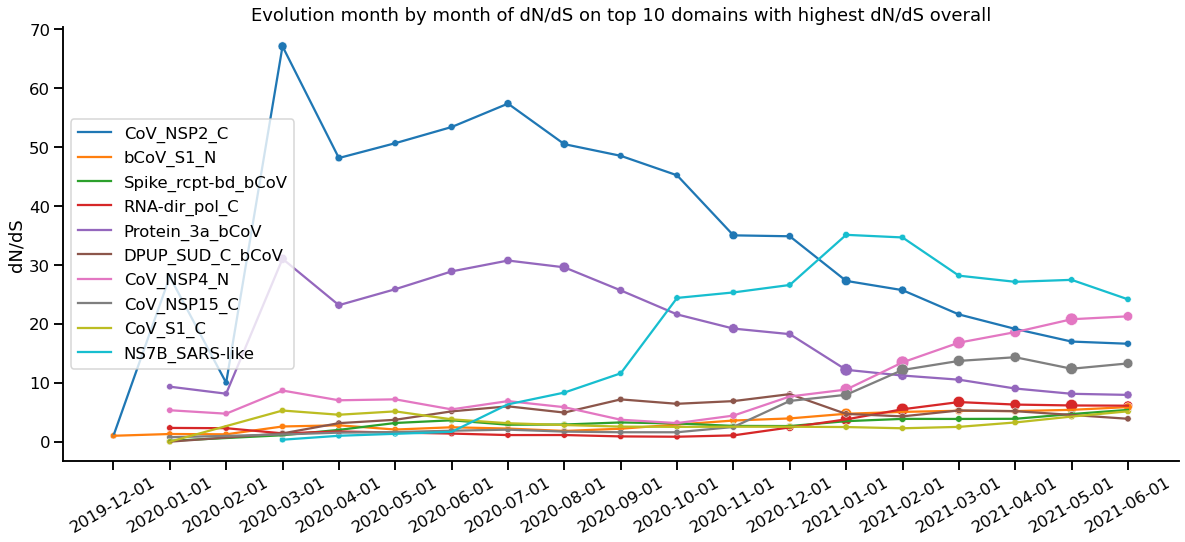

In [29]:
plt.figure(figsize=(20, 8))
data_top_10_domains = data_by_domain_all_countries[(data_by_domain_all_countries.domain.isin(top_10_domains))].sort_values("month")
sns.lineplot(data=data_top_10_domains, x="month", y="dn_ds_accum", hue="domain")
sns.scatterplot(data=data_top_10_domains, x="month", y="dn_ds_accum", hue="domain", size="dn", legend=False)
plt.xticks(rotation=30)
plt.title("Evolution month by month of N/S on top 10 domains with highest dN/dS overall")
plt.ylabel("dN/dS")
plt.xlabel(None)
plt.legend(title=None)
sns.despine()
plt.savefig('dn_ds_by_month_on_top10_domains.png')

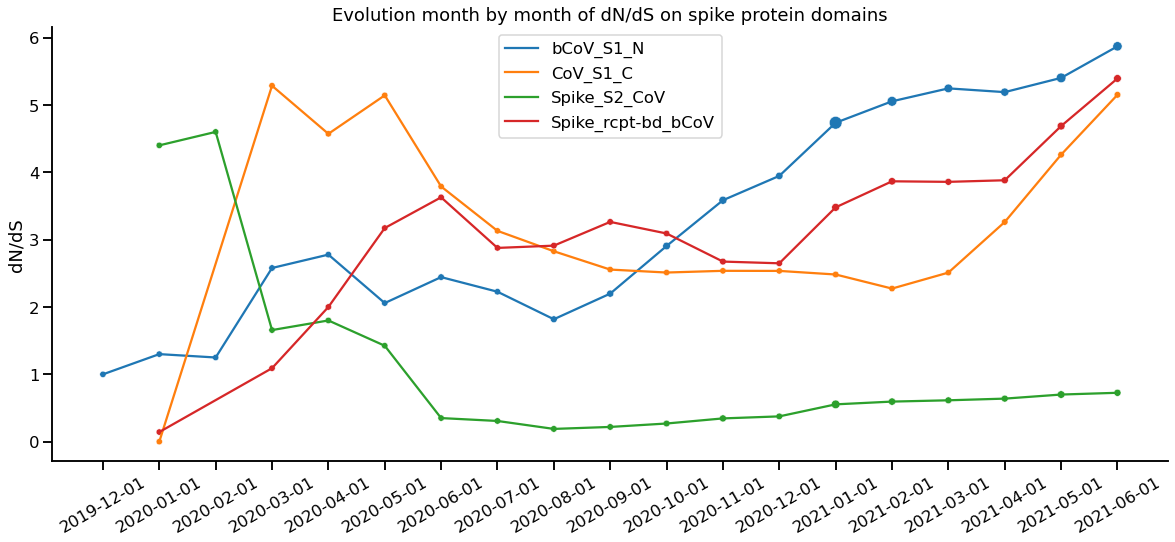

In [30]:
plt.figure(figsize=(20, 8))
data_top_10_domains = data_by_domain_all_countries[(data_by_domain_all_countries.domain.isin(spike_domains))].sort_values("month")
sns.lineplot(data=data_top_10_domains, x="month", y="dn_ds_accum", hue="domain")
sns.scatterplot(data=data_top_10_domains, x="month", y="dn_ds_accum", hue="domain", size="dn", legend=False)
plt.xticks(rotation=30)
plt.title("Evolution month by month of dN/dS on spike protein domains")
plt.ylabel("dN/dS")
plt.xlabel(None)
plt.legend(title=None)
sns.despine()
plt.savefig('dn_ds_by_month_on_top5_spike_domains.png')